# This project simulates a fictional Nigerian Tech School (NTS) summer course registration

This project simulates regristration to a fictional tech school

## Generating and Simulating Data

### Import libraries

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nigerian_names as ng_names
# from sqlalchemy import create_engine
# import sqlite3

### Database Tables to be created

**registrations**
* reg_id
* date_registered
* first_name
* last_name
* gender
* age
* phone
* email
* course_id
* payment_id
* pct_paid

**courses**
* course_id
* title
* duration
* price


### Courses and their hypothesized duration, probability distribution, and price

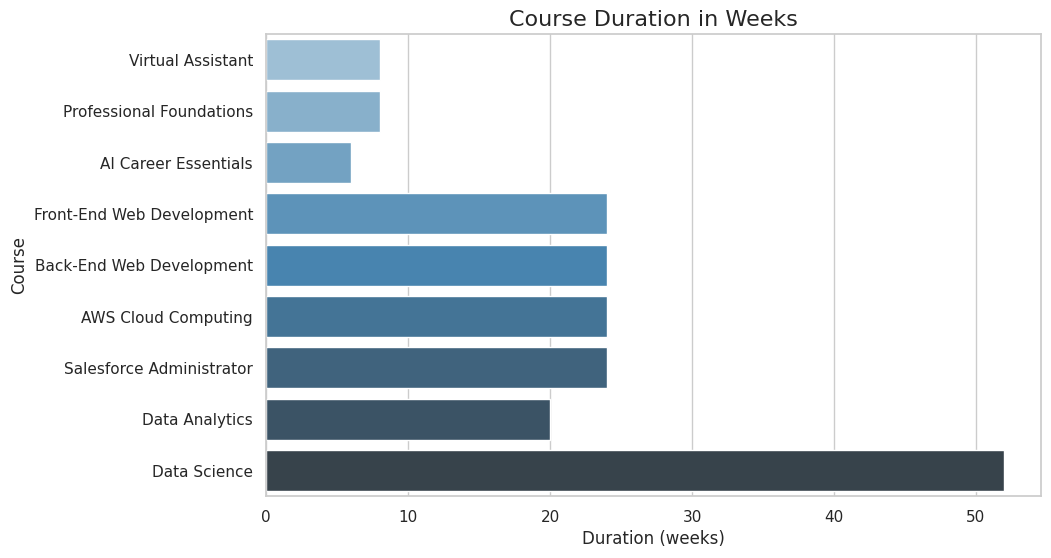

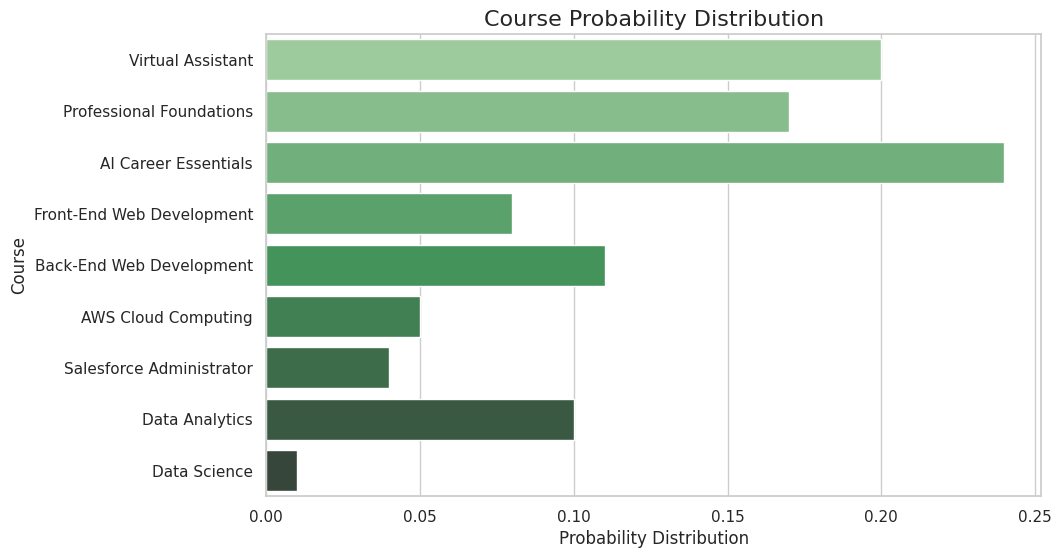

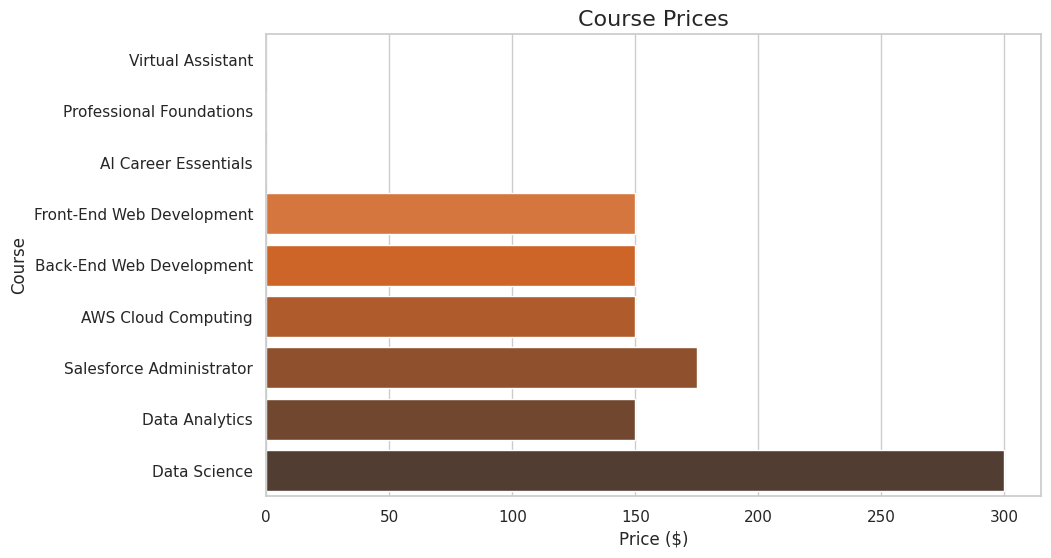

In [2]:
course_duration_in_weeks = {
    'Virtual Assistant': 8,
    'Professional Foundations': 8,
    'AI Career Essentials': 6,
    'Front-End Web Development': 24,
    'Back-End Web Development': 24,
    'AWS Cloud Computing': 24,
    'Salesforce Administrator': 24,
    'Data Analytics': 20,
    'Data Science': 52
}

course_probability_distribution = {
    'Virtual Assistant': 0.20,
    'Professional Foundations': 0.17,
    'AI Career Essentials': 0.24,
    'Front-End Web Development': 0.08,
    'Back-End Web Development': 0.11,
    'AWS Cloud Computing': 0.05,
    'Salesforce Administrator': 0.04,
    'Data Analytics': 0.10,
    'Data Science': 0.01,
}


course_price = {
    'Virtual Assistant': 0,
    'Professional Foundations': 0,
    'AI Career Essentials': 0,
    'Front-End Web Development': 150,
    'Back-End Web Development': 150,
    'AWS Cloud Computing': 150,
    'Salesforce Administrator': 175,
    'Data Analytics': 150,
    'Data Science': 300
}



# Combine the dictionaries into a DataFrame for visualization
data = pd.DataFrame({
    'Course': course_duration_in_weeks.keys(),
    'Duration (weeks)': course_duration_in_weeks.values(),
    'Probability Distribution': course_probability_distribution.values(),
    'Price ($)': course_price.values()
})

# Set the style of the plots
sns.set(style="whitegrid")

# Plot 1: Duration of courses
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Duration (weeks)", y="Course", hue="Course", palette="Blues_d")
plt.title("Course Duration in Weeks", fontsize=16)
plt.xlabel("Duration (weeks)", fontsize=12)
plt.ylabel("Course", fontsize=12)
plt.show()

# Plot 2: Probability distribution of courses
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Probability Distribution", y="Course", hue="Course", palette="Greens_d")
plt.title("Course Probability Distribution", fontsize=16)
plt.xlabel("Probability Distribution", fontsize=12)
plt.ylabel("Course", fontsize=12)
plt.show()

# Plot 3: Course prices
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Price ($)", y="Course", hue="Course", palette="Oranges_d")
plt.title("Course Prices", fontsize=16)
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Course", fontsize=12)
plt.show()


### Prompt user to input registration duration and average daily registration

In [3]:

reg_duration = int(input('How many days will the registration window span?\n'))
avg_reg_per_day = int(input('What is the hypothesized number of registrations per day?\n'))

How many days will the registration window span?
100
What is the hypothesized number of registrations per day?
150


### Generate registration dates based on user-specified registration timeframe

In [4]:
# generate 30 daily dates from 6 july 2024
# course registration is opened this date range

reg_dates = pd.date_range('2024-08-01', periods=reg_duration, freq='D')
print('Registration Dates:', reg_dates)

print('\n', f'Hence, registration starts by {str(reg_dates[0])[:10]} and ends by {str(reg_dates[-1])[:10]}')

Registration Dates: DatetimeIndex(['2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04',
               '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08',
               '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12',
               '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
               '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20',
               '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24',
               '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01',
               '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05',
               '2024-09-06', '2024-09-07', '2024-09-08', '2024-09-09',
               '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
               '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17',
               '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-21',
               '2024-09-22', '2024-09-23', '2024-09-24', 

### Generate daily registration count for each the registration dates following the Poisson Distribution with the user-specified daily average as mean(lambda)

* The summation of each days registration count is the total number of registration

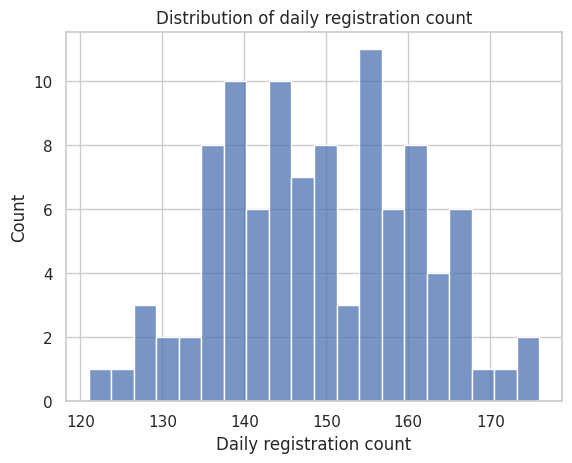


 There are 14897 registration in total


In [5]:
# Generate daily registration count for each the registration dates
# following the Poisson Distribution with the user-specified daily average as mean(lambda)

from scipy.stats import poisson

np.random.seed(420)

daily_reg_count = [int(poisson.rvs(avg_reg_per_day)) for i in range(reg_duration)]

total_reg_count = sum(daily_reg_count)

sns.histplot(daily_reg_count, bins=20)
plt.title('Distribution of daily registration count')
plt.xlabel('Daily registration count')
plt.show()

# print('\n', 'Daily Registration Count:', daily_reg_count)
print('\n', f'There are {total_reg_count} registration in total')


### Date Registered column
generate `date_registered` coulmn data by:
* zipping each date with a respective daily registration count
* repeating each date value by their respective daily registration count

In [6]:
# zip dates and daily registration count and generate dictionary
# this will represent the date registered column

# daily_reg_dict = {str(date)[:10]: reg_count for date, reg_count in zip(reg_dates, daily_reg_count)}
daily_reg_dict = {date: reg_count for date, reg_count in zip(reg_dates, daily_reg_count)}
# print(daily_reg_dict)
date_registered = [key for key, val in daily_reg_dict.items() for i in range(val)]

# print(daily_reg_dict)
# print(date_registered)
print(f'There are {len(date_registered)} date registered records')

There are 14897 date registered records


### Age Column
generate `age` coulmn data following a normal distribution

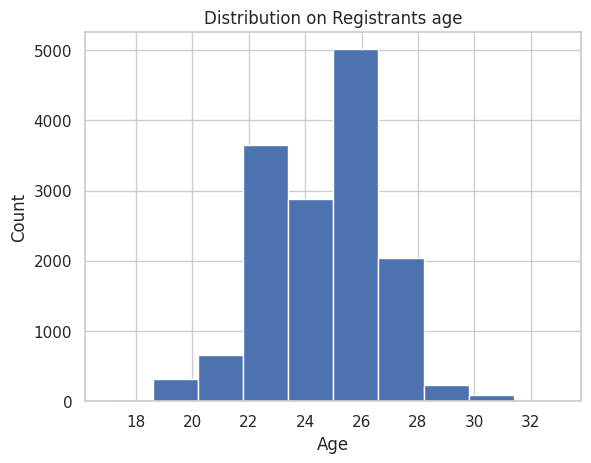

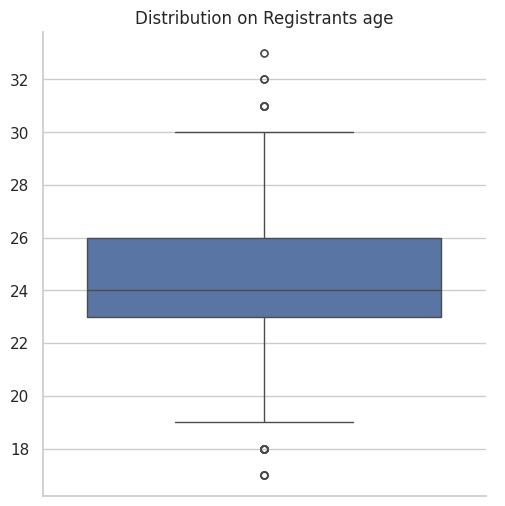


 There are 14897 age records

 The average age is 24.


In [7]:
# generate intergers for each registrant following the normal distribution with mean 25 and std of 2.5
# this will represent the age column

from scipy.stats import norm

np.random.seed(420)
# age = [int(np.random.normal(25, 2.5)) for i in range(138)]
age = [int(norm.rvs(25, 2)) for i in range(total_reg_count)]

# hist plot of age
plt.hist(age)
plt.title('Distribution on Registrants age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print()
# box plot of age
sns.catplot(y=age, kind='box')
plt.title('Distribution on Registrants age')
plt.show();

# print('\n', 'Ages:', age)
print('\n', f'There are {len(age)} age records')
print('\n', f'The average age is {int(np.round(np.mean(age)))}.')

### Phone Columns
Generate a phone number for each respective registrant

In [8]:
# generate 138 random integers from 2345678 to 3456789 without replacement and prepend with '+419'
# this will represent the phone_number column

import numpy as np
# subscriber number part of phone number (last 7 digits)
sub_num_range = range(2345678, 3456789)
# print(len(sub_num_range))

np.random.seed(420)
# replace = false for distinct unordered/random_ordered phone numbers per user (time intensive)
# sub_num_generator = (int(np.random.choice(sub_num_range, replace=False)) for i in range(total_reg_count))

sub_num_generator = np.random.choice(sub_num_range, total_reg_count, replace=False)

phone = ['+999800' + str(x) for x in sub_num_generator]

# print(phone)
print('\n', f'There are {len(phone)} phone numbers.')


 There are 14897 phone numbers.


### Assign a course to each registrant following their respective probability distribution

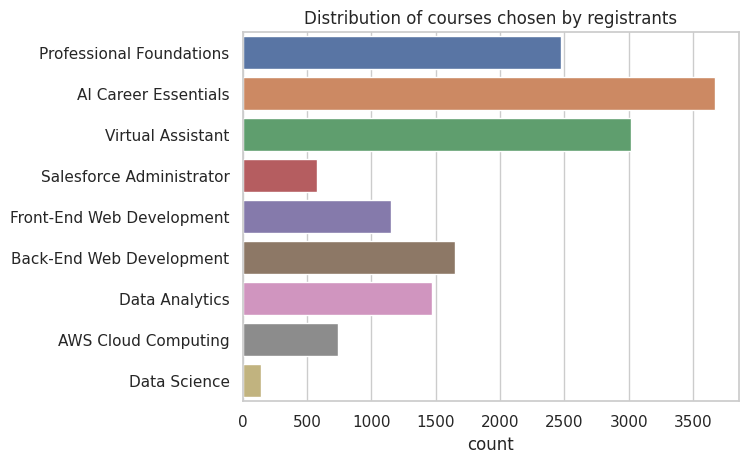


 There are 14897 registrations for courses


In [9]:
# choose courses total reg times based on their probability
# this will represent the course column
np.random.seed(420)
course = np.random.choice(list(course_probability_distribution.keys()), total_reg_count, p=list(course_probability_distribution.values()))


# visulize choice
import seaborn as sns
# rotate the x axis of the countplot below
# reset figure pallete
# sns.set_palette('deep')
# plt.figure(figsize=(12, 8))
plt.title("Distribution of courses chosen by registrants")
sns.countplot(y=course, hue=course)
# plt.xticks(rotation=90)
plt.show()

print('\n', f'There are {len(course)} registrations for courses')

### Gender Column
Generated the gender data of registrants following a binary distribution with:
* male at 60%
* female at 40%

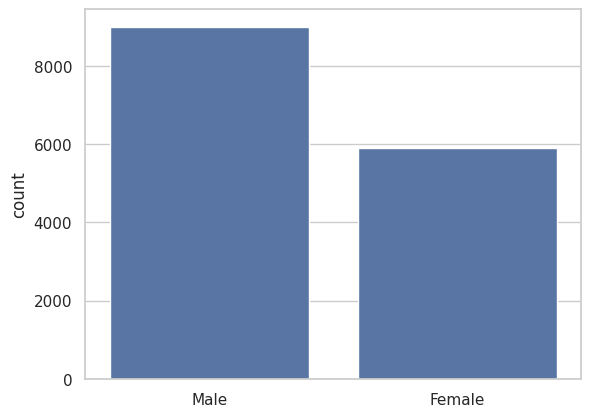


 There are 9001 male and 5896 females, totaling 14897


In [10]:
# generate  male or female data following the binomial distribution where male is 0.60 and female is 0.40 using the binom module in stats
# this will represent the gender column

from scipy.stats import binom

np.random.seed(420)
gender_binom = [int(binom.rvs(1, 0.6)) for i in range(total_reg_count)]

gender = ['Male' if i else 'Female' for i in gender_binom]

sns.countplot(x=gender)
plt.show()

# print('\n', 'Gender:', gender)
print('\n', f'There are {sum(gender_binom)} male and {len(gender_binom) - sum(gender_binom)} females, totaling {len(gender_binom)}')

### First Name and Last Name Columns
Generate the names of registrants by reading from a custom module containing Nigerian names

In [11]:
# first name, last name
np.random.seed(420)

first_name = [np.random.choice(ng_names.male_names) if x else np.random.choice(ng_names.female_names) for x in gender_binom]

last_name = [np.random.choice(ng_names.surnames) for x in gender_binom]

print(f'There are {len(first_name)} first_names')
print(f'There are {len(last_name)} last_names')

There are 14897 first_names
There are 14897 last_names


### Email column
Generate email column using registrant names. randomize email domain suffix to ensure unique

In [12]:
# email
# suffix email to ensure uniquness in case of duplicate names
email_name_joiner = ['', '.', '_']
# email domain suffixes are spelt incorrectly on purpose
email_domain = ['@ggmail.com', '@yyahoo.com', '@outlookk.com']
prob = [0.7, 0.2, 0.1]

np.random.seed(420)
email_suffix_gen = np.random.choice(range(1990, (total_reg_count + 1990)), total_reg_count, replace=False)

email = [first_name[i].lower() + np.random.choice(email_name_joiner, p=prob) + last_name[i].lower() + np.random.choice(email_name_joiner, p=prob) \
            + str(email_suffix_gen[i]) + np.random.choice(email_domain, p=prob) for i in range(total_reg_count)]

print(f'There are {len(email)} emails')

There are 14897 emails


## Creating Database using Generated Columns

### create dataframe from generated column data

In [13]:
# genrated dataframe

df_list = list(zip( date_registered, first_name, last_name, gender, age, phone, email, course,))

df = pd.DataFrame(df_list, columns=['date_registered', 'first_name', 'last_name', 'gender', 'age', 'phone', 'email', 'course', ])

print(df.info())

# print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14897 entries, 0 to 14896
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_registered  14897 non-null  datetime64[ns]
 1   first_name       14897 non-null  object        
 2   last_name        14897 non-null  object        
 3   gender           14897 non-null  object        
 4   age              14897 non-null  int64         
 5   phone            14897 non-null  object        
 6   email            14897 non-null  object        
 7   course           14897 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 931.2+ KB
None


In [14]:
# inspect dataframe
df.head(10)

,date_registered,first_name,last_name,gender,age,phone,email,course
0,2024-08-01,Chinedu,Coker,Male,24,+9998002357238,chineducoker.14841@ggmail.com,Professional Foundations
1,2024-08-01,Chibueze,Bakare,Male,21,+9998002990815,chibuezebakare_10899@yyahoo.com,AI Career Essentials
2,2024-08-01,Raufu,Umeadi,Male,23,+9998002874143,raufuumeadi5164@ggmail.com,Professional Foundations
3,2024-08-01,Emeka,Ezekwesili,Male,24,+9998003102385,emekaezekwesili.9166@yyahoo.com,Virtual Assistant
4,2024-08-01,Lara,Anibaba,Female,25,+9998003239810,laraanibaba12492@ggmail.com,Salesforce Administrator
5,2024-08-01,Isioma,Abiola,Female,26,+9998002703683,isiomaabiola7935@outlookk.com,Front-End Web Development
6,2024-08-01,Oluwaseun,Aboderin,Male,23,+9998002600367,oluwaseunaboderin_3942@outlookk.com,Professional Foundations
7,2024-08-01,Tayo,Okigbo,Male,24,+9998003452424,tayo.okigbo13182@outlookk.com,Virtual Assistant
8,2024-08-01,Foluke,Balogun,Female,27,+9998003184043,folukebalogun_9688@ggmail.com,Front-End Web Development
9,2024-08-01,Henry,Raji,Male,28,+9998002891919,henry_raji_8866@ggmail.com,AI Career Essentials


### Course Duration Column
Generate course duration column by mapping duration to course name

In [15]:
# course track and duration
# add duration feature to df referencing the course_duration_in_weeks dictionary
df['duration_in_weeks'] = df['course'].map(course_duration_in_weeks)
df.head(50)

,date_registered,first_name,last_name,gender,age,phone,email,course,duration_in_weeks
0,2024-08-01,Chinedu,Coker,Male,24,+9998002357238,chineducoker.14841@ggmail.com,Professional Foundations,8
1,2024-08-01,Chibueze,Bakare,Male,21,+9998002990815,chibuezebakare_10899@yyahoo.com,AI Career Essentials,6
2,2024-08-01,Raufu,Umeadi,Male,23,+9998002874143,raufuumeadi5164@ggmail.com,Professional Foundations,8
3,2024-08-01,Emeka,Ezekwesili,Male,24,+9998003102385,emekaezekwesili.9166@yyahoo.com,Virtual Assistant,8
4,2024-08-01,Lara,Anibaba,Female,25,+9998003239810,laraanibaba12492@ggmail.com,Salesforce Administrator,24
5,2024-08-01,Isioma,Abiola,Female,26,+9998002703683,isiomaabiola7935@outlookk.com,Front-End Web Development,24
6,2024-08-01,Oluwaseun,Aboderin,Male,23,+9998002600367,oluwaseunaboderin_3942@outlookk.com,Professional Foundations,8
7,2024-08-01,Tayo,Okigbo,Male,24,+9998003452424,tayo.okigbo13182@outlookk.com,Virtual Assistant,8
8,2024-08-01,Foluke,Balogun,Female,27,+9998003184043,folukebalogun_9688@ggmail.com,Front-End Web Development,24
9,2024-08-01,Henry,Raji,Male,28,+9998002891919,henry_raji_8866@ggmail.com,AI Career Essentials,6


### Course Price Column
Generate course duration column by mapping price to course name

In [16]:
# add price feature to df referencing the course_price dictionary
df['price'] = df['course'].map(course_price)
df.head(50)

,date_registered,first_name,last_name,gender,age,phone,email,course,duration_in_weeks,price
0,2024-08-01,Chinedu,Coker,Male,24,+9998002357238,chineducoker.14841@ggmail.com,Professional Foundations,8,0
1,2024-08-01,Chibueze,Bakare,Male,21,+9998002990815,chibuezebakare_10899@yyahoo.com,AI Career Essentials,6,0
2,2024-08-01,Raufu,Umeadi,Male,23,+9998002874143,raufuumeadi5164@ggmail.com,Professional Foundations,8,0
3,2024-08-01,Emeka,Ezekwesili,Male,24,+9998003102385,emekaezekwesili.9166@yyahoo.com,Virtual Assistant,8,0
4,2024-08-01,Lara,Anibaba,Female,25,+9998003239810,laraanibaba12492@ggmail.com,Salesforce Administrator,24,175
5,2024-08-01,Isioma,Abiola,Female,26,+9998002703683,isiomaabiola7935@outlookk.com,Front-End Web Development,24,150
6,2024-08-01,Oluwaseun,Aboderin,Male,23,+9998002600367,oluwaseunaboderin_3942@outlookk.com,Professional Foundations,8,0
7,2024-08-01,Tayo,Okigbo,Male,24,+9998003452424,tayo.okigbo13182@outlookk.com,Virtual Assistant,8,0
8,2024-08-01,Foluke,Balogun,Female,27,+9998003184043,folukebalogun_9688@ggmail.com,Front-End Web Development,24,150
9,2024-08-01,Henry,Raji,Male,28,+9998002891919,henry_raji_8866@ggmail.com,AI Career Essentials,6,0


### Percent Paid Column
Generate percent paid column by:
* assigning 100 (fully paid) to free courses
* assigning a range of percentage values to paid courses with

pay_pct: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
pay_prob: [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.275, 0.275]



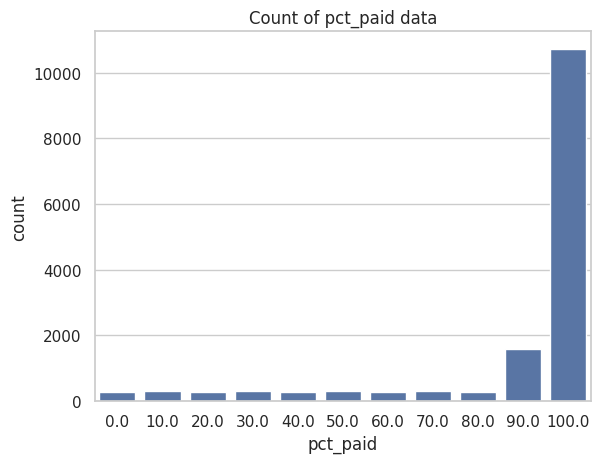

,date_registered,first_name,last_name,gender,age,phone,email,course,duration_in_weeks,price,pct_paid
0,2024-08-01,Chinedu,Coker,Male,24,+9998002357238,chineducoker.14841@ggmail.com,Professional Foundations,8,0,100.0
1,2024-08-01,Chibueze,Bakare,Male,21,+9998002990815,chibuezebakare_10899@yyahoo.com,AI Career Essentials,6,0,100.0
2,2024-08-01,Raufu,Umeadi,Male,23,+9998002874143,raufuumeadi5164@ggmail.com,Professional Foundations,8,0,100.0
3,2024-08-01,Emeka,Ezekwesili,Male,24,+9998003102385,emekaezekwesili.9166@yyahoo.com,Virtual Assistant,8,0,100.0
4,2024-08-01,Lara,Anibaba,Female,25,+9998003239810,laraanibaba12492@ggmail.com,Salesforce Administrator,24,175,60.0


In [17]:
pay_pct = [x for x in range(0,101,10)]
pay_prob = [.05 if x < 9 else .275 for x in range(11)]
print('pay_pct:', pay_pct)
print('pay_prob:', pay_prob)

# add pct_paid to df. if price is 0 then pct_paid is 100 else a random multiple of 10
np.random.seed(420)
df['pct_paid'] = df['price'].apply(lambda x: 100 if x == 0 else np.floor(np.random.choice(pay_pct, p=pay_prob)))

# visualize percentage paid
sns.countplot(x=df['pct_paid'])
plt.title("Count of pct_paid data")
print()
plt.show()
print()
df.head(5)

### Course DataFrame
Dataframe for courses
* course_id
* title
* duration
* price

In [18]:
courses_df = df.groupby('course')[['duration_in_weeks', 'price']].first().reset_index().set_index(pd.Index(range(1, len(df['course'].unique()) + 1))).reset_index()
courses_df.rename(columns={'index' : 'course_id', 'course' : 'title'}, inplace=True)
courses_df

,course_id,title,duration_in_weeks,price
0,1,AI Career Essentials,6,0
1,2,AWS Cloud Computing,24,150
2,3,Back-End Web Development,24,150
3,4,Data Analytics,20,150
4,5,Data Science,52,300
5,6,Front-End Web Development,24,150
6,7,Professional Foundations,8,0
7,8,Salesforce Administrator,24,175
8,9,Virtual Assistant,8,0


### Registration DataFrame
Dataframe for registration
* reg_id
* date_registered
* first_name
* last_name
* gender
* age
* phone
* email
* pct_paid
* course_id


In [19]:
reg_df = df[['date_registered', 'first_name', 'last_name', 'gender', 'age', 'phone', 'email', 'course', 'pct_paid']].set_index(pd.Index(range(1, df.shape[0] + 1))).reset_index().rename(columns={'index' : 'reg_id'})

# dict to map course id to reg_df using
course_dict = {row[1]['title'] : row[1]['course_id'] for row in courses_df[['title', 'course_id']].iterrows()}

reg_df['course_id'] = reg_df['course'].map(course_dict)

reg_df.drop(['course'], axis=1)





,reg_id,date_registered,first_name,last_name,gender,age,phone,email,pct_paid,course_id
0,1,2024-08-01,Chinedu,Coker,Male,24,+9998002357238,chineducoker.14841@ggmail.com,100.0,7
1,2,2024-08-01,Chibueze,Bakare,Male,21,+9998002990815,chibuezebakare_10899@yyahoo.com,100.0,1
2,3,2024-08-01,Raufu,Umeadi,Male,23,+9998002874143,raufuumeadi5164@ggmail.com,100.0,7
3,4,2024-08-01,Emeka,Ezekwesili,Male,24,+9998003102385,emekaezekwesili.9166@yyahoo.com,100.0,9
4,5,2024-08-01,Lara,Anibaba,Female,25,+9998003239810,laraanibaba12492@ggmail.com,60.0,8
...,...,...,...,...,...,...,...,...,...,...
14892,14893,2024-11-08,Hannah,Udo,Female,27,+9998002566362,hannahudo15077@outlookk.com,100.0,4
14893,14894,2024-11-08,Terrence,Adedoyin,Male,24,+9998003390058,terrence.adedoyin6661@ggmail.com,100.0,7
14894,14895,2024-11-08,Musa,Adeniran,Male,23,+9998002549588,musaadeniran6476@ggmail.com,100.0,7
14895,14896,2024-11-08,Maria,Udoh,Female,22,+9998003395775,maria.udoh_15374@ggmail.com,20.0,3


## Create Database Tables from created dataframes

### create database tables

In [20]:
#SQLALCHEMY
from sqlalchemy import create_engine


# Create a SQLite database engine using SQLAlchemy
engine = create_engine('sqlite:///nts_reg.db')

# export courses_df to sql
courses_df.to_sql('courses', engine, if_exists='replace', index=False)

# export reg_df to sql
reg_df.to_sql('registrations', engine, if_exists='replace', index=False)




14897

### query the newly created tables to dataframe

In [21]:
# Query the courses table
query = "SELECT * FROM courses"
result = pd.read_sql(query, con=engine)

# Display the result
print(result)

   course_id                      title  duration_in_weeks  price
0          1       AI Career Essentials                  6      0
1          2        AWS Cloud Computing                 24    150
2          3   Back-End Web Development                 24    150
3          4             Data Analytics                 20    150
4          5               Data Science                 52    300
5          6  Front-End Web Development                 24    150
6          7   Professional Foundations                  8      0
7          8   Salesforce Administrator                 24    175
8          9          Virtual Assistant                  8      0


In [22]:
# Query the registrations table
query = "SELECT * FROM registrations limit 5"
result = pd.read_sql(query, con=engine)

# Display the result
print(result)

   reg_id             date_registered first_name   last_name  gender  age  \
0       1  2024-08-01 00:00:00.000000    Chinedu       Coker    Male   24   
1       2  2024-08-01 00:00:00.000000   Chibueze      Bakare    Male   21   
2       3  2024-08-01 00:00:00.000000      Raufu      Umeadi    Male   23   
3       4  2024-08-01 00:00:00.000000      Emeka  Ezekwesili    Male   24   
4       5  2024-08-01 00:00:00.000000       Lara     Anibaba  Female   25   

            phone                            email                    course  \
0  +9998002357238    chineducoker.14841@ggmail.com  Professional Foundations   
1  +9998002990815  chibuezebakare_10899@yyahoo.com      AI Career Essentials   
2  +9998002874143       raufuumeadi5164@ggmail.com  Professional Foundations   
3  +9998003102385  emekaezekwesili.9166@yyahoo.com         Virtual Assistant   
4  +9998003239810      laraanibaba12492@ggmail.com  Salesforce Administrator   

   pct_paid  course_id  
0     100.0          7  
1     

### query the newly created tables using ipython-sql magic

In [23]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [24]:
%load_ext sql

In [25]:
%sql sqlite:///nts_reg.db

In [26]:
%sql select * from courses

 * sqlite:///nts_reg.db
Done.


course_id,title,duration_in_weeks,price
1,AI Career Essentials,6,0
2,AWS Cloud Computing,24,150
3,Back-End Web Development,24,150
4,Data Analytics,20,150
5,Data Science,52,300
6,Front-End Web Development,24,150
7,Professional Foundations,8,0
8,Salesforce Administrator,24,175
9,Virtual Assistant,8,0


In [27]:
%sql select * from registrations limit 5

 * sqlite:///nts_reg.db
Done.


reg_id,date_registered,first_name,last_name,gender,age,phone,email,course,pct_paid,course_id
1,2024-08-01 00:00:00.000000,Chinedu,Coker,Male,24,+9998002357238,chineducoker.14841@ggmail.com,Professional Foundations,100.0,7
2,2024-08-01 00:00:00.000000,Chibueze,Bakare,Male,21,+9998002990815,chibuezebakare_10899@yyahoo.com,AI Career Essentials,100.0,1
3,2024-08-01 00:00:00.000000,Raufu,Umeadi,Male,23,+9998002874143,raufuumeadi5164@ggmail.com,Professional Foundations,100.0,7
4,2024-08-01 00:00:00.000000,Emeka,Ezekwesili,Male,24,+9998003102385,emekaezekwesili.9166@yyahoo.com,Virtual Assistant,100.0,9
5,2024-08-01 00:00:00.000000,Lara,Anibaba,Female,25,+9998003239810,laraanibaba12492@ggmail.com,Salesforce Administrator,60.0,8


In [28]:
%%sql
select *
from registrations
inner join courses
using(course_id)
limit 50

 * sqlite:///nts_reg.db
Done.


reg_id,date_registered,first_name,last_name,gender,age,phone,email,course,pct_paid,course_id,title,duration_in_weeks,price
1,2024-08-01 00:00:00.000000,Chinedu,Coker,Male,24,+9998002357238,chineducoker.14841@ggmail.com,Professional Foundations,100.0,7,Professional Foundations,8,0
2,2024-08-01 00:00:00.000000,Chibueze,Bakare,Male,21,+9998002990815,chibuezebakare_10899@yyahoo.com,AI Career Essentials,100.0,1,AI Career Essentials,6,0
3,2024-08-01 00:00:00.000000,Raufu,Umeadi,Male,23,+9998002874143,raufuumeadi5164@ggmail.com,Professional Foundations,100.0,7,Professional Foundations,8,0
4,2024-08-01 00:00:00.000000,Emeka,Ezekwesili,Male,24,+9998003102385,emekaezekwesili.9166@yyahoo.com,Virtual Assistant,100.0,9,Virtual Assistant,8,0
5,2024-08-01 00:00:00.000000,Lara,Anibaba,Female,25,+9998003239810,laraanibaba12492@ggmail.com,Salesforce Administrator,60.0,8,Salesforce Administrator,24,175
6,2024-08-01 00:00:00.000000,Isioma,Abiola,Female,26,+9998002703683,isiomaabiola7935@outlookk.com,Front-End Web Development,90.0,6,Front-End Web Development,24,150
7,2024-08-01 00:00:00.000000,Oluwaseun,Aboderin,Male,23,+9998002600367,oluwaseunaboderin_3942@outlookk.com,Professional Foundations,100.0,7,Professional Foundations,8,0
8,2024-08-01 00:00:00.000000,Tayo,Okigbo,Male,24,+9998003452424,tayo.okigbo13182@outlookk.com,Virtual Assistant,100.0,9,Virtual Assistant,8,0
9,2024-08-01 00:00:00.000000,Foluke,Balogun,Female,27,+9998003184043,folukebalogun_9688@ggmail.com,Front-End Web Development,50.0,6,Front-End Web Development,24,150
10,2024-08-01 00:00:00.000000,Henry,Raji,Male,28,+9998002891919,henry_raji_8866@ggmail.com,AI Career Essentials,100.0,1,AI Career Essentials,6,0


In [29]:
# !pip install sqlalchemy==1.4.4

In [30]:
# #SQLITE3
# import sqlite3

# # create sqlite3 connection
# engine = sqlite3.connect('nts_reg.db')

# # export courses_df to sql
# courses_df.to_sql('courses', engine, if_exists='replace', index=False)

# # export reg_df to sql
# reg_df.to_sql('registrations', engine, if_exists='replace', index=False)



